In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Plotting using Matplotlib</h1>

<p>Matplotlib is difficult to control, but is able to present the graph and predict the price of ARIMA properly.</p>

In [57]:
# Sample historical price data
data = {'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'Price': [100, 102, 104, 103, 107, 110, 115, 120, 118, 122]}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Fit an ARIMA model
# (p, d, q) parameters can be tuned; here, we'll use (1, 1, 1) as an example
model = ARIMA(df['Price'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Predict the next price
forecast = model_fit.forecast(steps=1)
predicted_price = forecast[0]

print(f'Predicted Price for the next day: {predicted_price}')

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -22.111
Date:                Fri, 06 Sep 2024   AIC                             50.222
Time:                        21:34:17   BIC                             50.813
Sample:                    01-01-2023   HQIC                            48.945
                         - 01-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.190      5.269      0.000       0.628       1.372
ma.L1         -0.9941     26.730     -0.037      0.970     -53.383      51.395
sigma2         6.3195    170.516      0.037      0.9

C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

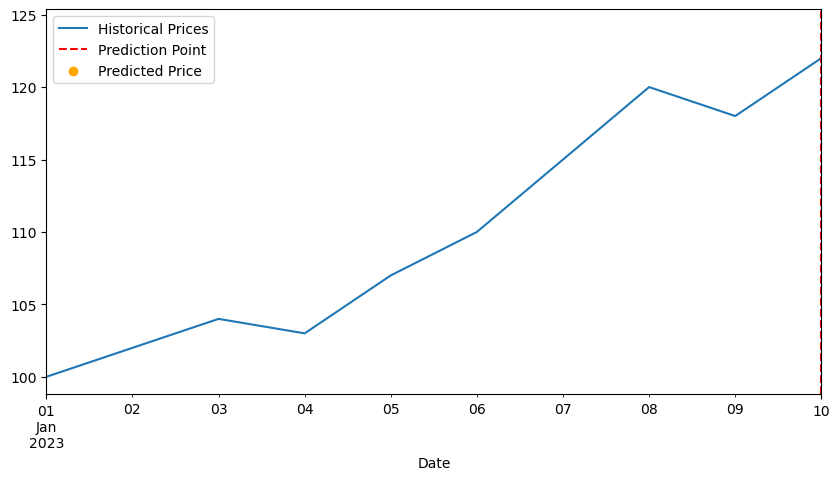

In [55]:
# Plot the historical data and the forecast
df['Price'].plot(label='Historical Prices', figsize=(10, 5))
plt.axvline(df.index[-1], color='red', linestyle='--', label='Prediction Point')
plt.scatter(df.index[-1] + pd.Timedelta(days=1), predicted_price, color='orange', label='Predicted Price')
plt.legend()
plt.show()

<h1>Plotting using Seaborn</h1>

As per usual, Seaborn is my go-to use. It's very easy to implement, and shows the point much more cleaner compared to the upper graph. Other room for improvement: Add another dashed line towards point, and other stuffs (aka other commodities, etc,.)

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -22.111
Date:                Fri, 06 Sep 2024   AIC                             50.222
Time:                        21:33:59   BIC                             50.813
Sample:                    01-01-2023   HQIC                            48.945
                         - 01-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.190      5.269      0.000       0.628       1.372
ma.L1         -0.9941     26.730     -0.037      0.970     -53.383      51.395
sigma2         6.3195    170.516      0.037      0.9

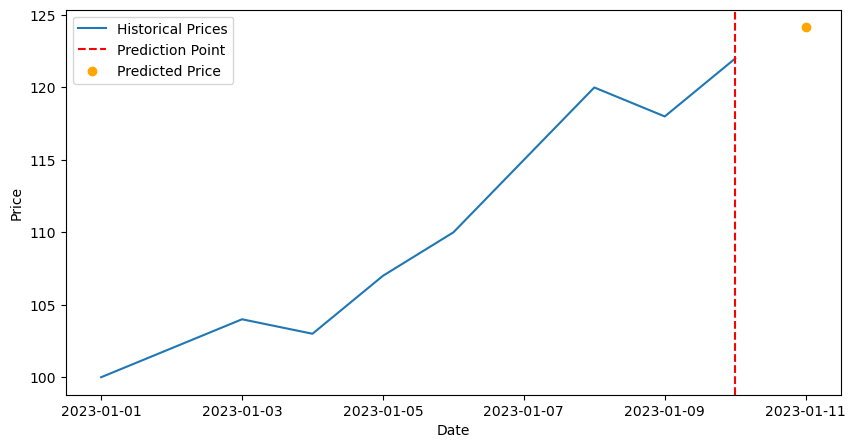

Predicted Price for the next day: 124.15844259966867


In [53]:
print(model_fit.summary())
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.index, y=df['Price'], label = 'Historical Prices')

plt.axvline(df.index[-1], color="red", linestyle='--', label="Prediction Point")
plt.scatter(df.index[-1] + pd.Timedelta(days=1), predicted_price, color='orange', label='Predicted Price')
plt.legend()
plt.show()
print(f'Predicted Price for the next day: {predicted_price}')

In [3]:
df = pd.read_csv('local_rice.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'local_rice.csv'

In [331]:
sp_rice = df[(df['Local Commercial Rice'] == "Special Rice")]
pd.DataFrame(sp_rice, columns=["Local Commecial Rice", "High", "Low"])
pd.to_datetime(sp_rice['Date'])
sp_rice.set_index(sp_rice['Date'], inplace=True)
sp_rice

,Local Commercial Rice,Low Price,High Price,Date
Date,,,,
2024-09-03,Special Rice,57.0,65.0,2024-09-03
2024-09-04,Special Rice,63.0,63.0,2024-09-04
2024-09-05,Special Rice,57.0,65.0,2024-09-05


In [333]:
x = (sp_rice[['Low Price', 'High Price']].mean(axis=1))
sp_rice['Average'] = x
sp_rice

C:\Users\steph\AppData\Local\Temp\ipykernel_25196\497644045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_rice['Average'] = x


,Local Commercial Rice,Low Price,High Price,Date,Average
Date,,,,,
2024-09-03,Special Rice,57.0,65.0,2024-09-03,61.0
2024-09-04,Special Rice,63.0,63.0,2024-09-04,63.0
2024-09-05,Special Rice,57.0,65.0,2024-09-05,61.0


In [335]:
model = ARIMA(sp_rice['Average'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

forecast = model_fit.forecast(steps=1)
predicted_price = forecast[0]

print(f'Predicted Price for the next day: {predicted_price}')
## for i, x in enumerate(forecast):
   ## print("")

C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\steph\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarni

                               SARIMAX Results                                
Dep. Variable:                Average   No. Observations:                    3
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   0.600
Date:                Fri, 06 Sep 2024   AIC                              4.801
Time:                        22:35:52   BIC                              0.880
Sample:                    09-03-2024   HQIC                            -3.398
                         - 09-05-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9997      0.001  -1367.582      0.000      -1.001      -0.998
ma.L1         -0.9955   1.35e-07   -7.4e+06      0.000      -0.995      -0.995
sigma2         0.0003      0.001      0.500      0.6

C:\Users\steph\AppData\Local\Temp\ipykernel_25196\3357073729.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_price = forecast[0]


TypeError: can only concatenate str (not "Timedelta") to str

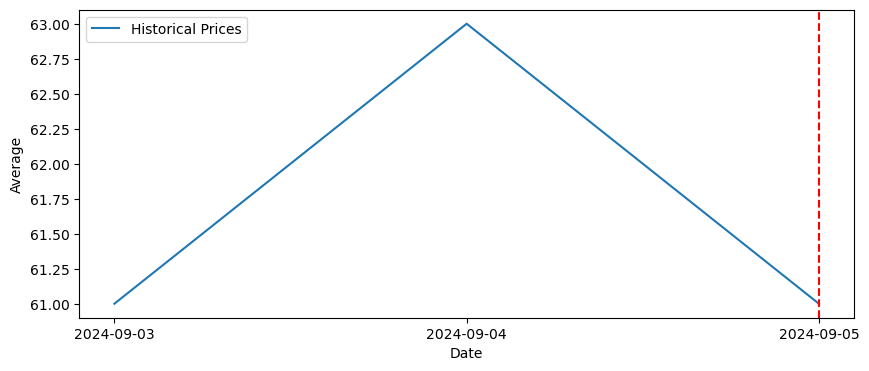

In [337]:

plt.figure(figsize=(10, 4))
sns.lineplot(x=sp_rice.index, y=sp_rice['Average'], label = 'Historical Prices')

plt.axvline(sp_rice.index[-1], color="red", linestyle='--', label="Prediction Point")
plt.scatter(sp_rice.index[-1] + pd.Timedelta(days=1), predicted_price, color='orange', label='Predicted Price')
plt.legend()
plt.show()
print(f'Predicted Price for the next day: {predicted_price}')